# Data Mining in Titanic Data
1. [Introduction](#introduction)
1. [Association Rule Mining](#association-rule-mining)
1. [Association Rule Mining on Titanic Data](#association-rule-mining-on-titanic-data)
    - [Ready Up](#ready-up)
    - [Data Visualization with Plots](#data-visualization-with-plots)
    - [Analysis - Methodology](#analysis---methodology)
    - [Gender Analysis](#gender-analysis)
    - [Gender Result](#gender-result)
    - [Title Analysis](#title-analysis)
    - [Title Result](#title-result)
1. [Algorithm Evaluation](#algorithm-evaluation)        
1. [References](#references)


# Association Rules Mining

### Algorithms:
---

- Apriori
- FP Growth

---

### Parameters:
---

1. **Support**
    - Ratio of the particular Object observation count to the total count.
    - In another words, the percentage of a object strength in total strength.   
    - Range \[0 - 1]
 
    $$  
        Support(B) = {Observations containing (B) \over Total Observations }
    $$
    
1. **Confidence**
    - How much confident association has with its pair.
    - Range \[0 - 1] 

    $$
        Confidence(A→B) = { Observations containing both (A and B)) \over (Observations containing A)}
    $$
    
1. **Lift**
    - How much likely associated than individually occurred.
    - Range \[0 - inf]
    - if <mark>lift > 1</mark> means, It is an **interesting scenario** to consider.

    $$
    Lift(A→B) = {Confidence (A→B) \over Support (B)}
    $$
        
1. **Leverage**
    - Range  \[-1, 1]
    - If <mark>leverage =0 </mark> means, Both are independent.
    
    $$
    L (A → B) =  {S (A→B) \over S (A) * S (B)}
    $$
        
1. **Conviction**
    - It is the metric to find the dependency on **premise** by the **consequent**.    
    - Range \[0 - inf]
    - If <mark>conviction = 1</mark>, items are independent.
    - High Confident with Lower support. That means it is mostly **depends** on the another product.
    
    $$
    C (A -> B) = {1 - S (B) \over 1 - Confidence (A → B)}
    $$   

---

### Import Packages
---

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

### Loading Data-set
---

In [5]:
titanic = pd.read_csv('titanic_dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
nominal_cols = ['Embarked','Pclass','Age', 'Survived', 'Sex']
cat_cols = ['Embarked','Pclass','Age', 'Survived', 'Title']
titanic['Title'] = titanic.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
titanic['Title'].fillna('Title_UK', inplace=True)
titanic['Embarked'].fillna('Unknown',inplace=True)
titanic['Age'].fillna(0, inplace=True)
# Replacing Binary with String
rep = {0: "Dead", 1: "Survived"}
titanic.replace({'Survived' : rep}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


### Binning Age Column
---

In [7]:
def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points)+1)
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

cut_points = [1, 10, 20, 50 ]
labels = ["Unknown", "Child", "Teen", "Adult", "Old"]
titanic['Age'] = binning(titanic['Age'], cut_points, labels)
in_titanic = titanic[nominal_cols]
cat_titanic = titanic[cat_cols]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,Dead,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,Survived,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S,Mrs.
4,5,Dead,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S,Mr.


### Gender Data
---

In [8]:
in_titanic.head()

,Embarked,Pclass,Age,Survived,Sex
0,S,3,Adult,Dead,male
1,C,1,Adult,Survived,female
2,S,3,Adult,Survived,female
3,S,1,Adult,Survived,female
4,S,3,Adult,Dead,male


### Title Data
---

In [9]:
cat_titanic.head()

,Embarked,Pclass,Age,Survived,Title
0,S,3,Adult,Dead,Mr.
1,C,1,Adult,Survived,Mrs.
2,S,3,Adult,Survived,Miss.
3,S,1,Adult,Survived,Mrs.
4,S,3,Adult,Dead,Mr.


### Data Visualization with Plots
---

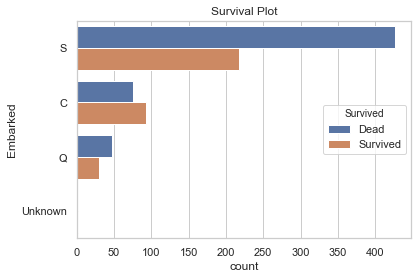

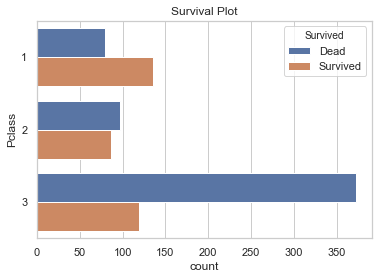

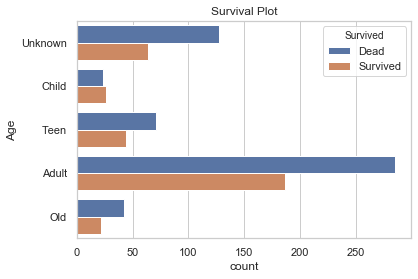

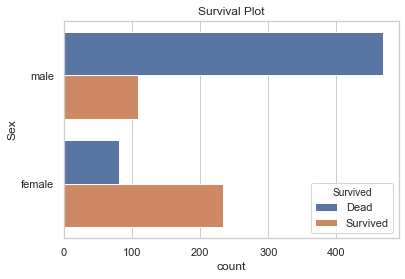

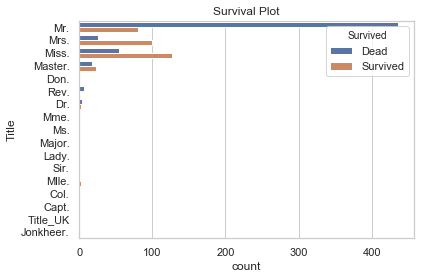

In [10]:
for x in ['Embarked', 'Pclass','Age', 'Sex', 'Title']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=titanic)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()

## Analysis - Methodology
---

1. Gender Wise
1. Title Wise

Because title is also a keyword which shows the **Gender type** of a person. Analysing these both fields
together will cause for the results with **100%** association with both fields. 

#### Example:
---
- (Mr.) always associated with Male.
- (Mrs.) always associated with Female.

Putting these two fields together does not make any sense. So that the analysis split into two types.

---

### Gender Analysis
---

In [11]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,1,2,3,Adult,C,Child,Dead,Old,Q,S,Survived,Teen,Unknown,female,male
0,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
1,True,False,False,True,True,False,False,False,False,False,True,False,False,True,False
2,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False
3,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False
4,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True


## Nominal Data fields

In [12]:
oht.columns_

['1',
 '2',
 '3',
 'Adult',
 'C',
 'Child',
 'Dead',
 'Old',
 'Q',
 'S',
 'Survived',
 'Teen',
 'Unknown',
 'female',
 'male']

## Apriori output

In [13]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output.head()

,support,itemsets
0,0.242697,(1)
1,0.206742,(2)
2,0.550562,(3)
3,0.528090,(Adult)
4,0.615730,(Dead)


### Running rule mining with Configuration :
---

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  antecedent support  :  0.7
-------------------------------------
   antecedents          consequents  antecedent support  consequent support  \
0          (S)                  (3)            0.723596            0.550562   
1          (S)              (Adult)            0.723596            0.528090   
2          (S)               (Dead)            0.723596            0.615730   
3          (S)           (Survived)            0.723596            0.384270   
4          (S)             (female)            0.723596            0.352809   
5          (S)               (male)            0.723596            0.647191   
6          (S)           (3, Adult)            0.723596            0.248315   
7          (S)            (3, Dead)            0.723596            0.416854   
8          (S)            (3, male)       

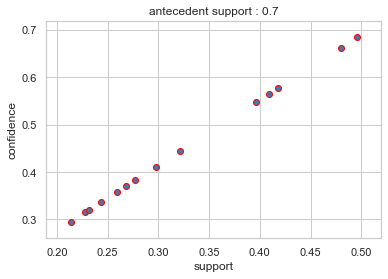

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  support  :  0.5
-------------------------------------
  antecedents consequents  antecedent support  consequent support   support  \
0      (Dead)      (male)            0.615730            0.647191  0.524719   
1      (male)      (Dead)            0.647191            0.615730  0.524719   

   confidence      lift  leverage  conviction  
0    0.852190  1.316752  0.126224    2.386905  
1    0.810764  1.316752  0.126224    2.030636  


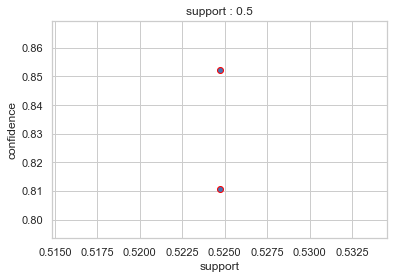

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
            antecedents consequents  antecedent support  consequent support  \
0                (Dead)      (male)            0.615730            0.647191   
1                (male)      (Dead)            0.647191            0.615730   
2            (3, Adult)         (S)            0.248315            0.723596   
3                (3, S)      (Dead)            0.396629            0.615730   
4             (3, Dead)      (male)            0.416854            0.647191   
5             (3, male)      (Dead)            0.388764            0.615730   
6         (Dead, Adult)         (S)            0.319101            0.723596   
7         (Dead, Adult)      (male)            0.319101            0.647191   
8         (male, Adult)      (Dead)            0.3

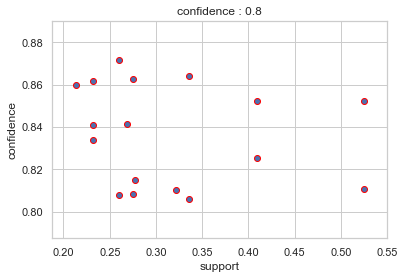

Empty Data Frame For Metric Type :  conviction  on Threshold :  3


In [14]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print ('Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th)
        continue
    print (rules.columns.values)
    print ('-------------------------------------')
    print ('Configuration : ', metric_type, ' : ', th)
    print ('-------------------------------------')
    print (rules)

    support=rules['support'].to_numpy()
    confidence=rules['confidence'].to_numpy()

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Gender Result


In [21]:
dataset = []
in_titanic=cat_titanic
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,1,2,3,Adult,C,Capt.,Child,Col.,Dead,Don.,...,Ms.,Old,Q,Rev.,S,Sir.,Survived,Teen,Title_UK,Unknown
0,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  antecedent support  :  0.7
-------------------------------------
   antecedents         consequents  antecedent support  consequent support  \
0          (S)                 (3)            0.723596            0.550562   
1          (S)             (Adult)            0.723596            0.528090   
2          (S)              (Dead)            0.723596            0.615730   
3          (S)               (Mr.)            0.723596            0.579775   
4          (S)          (Survived)            0.723596            0.384270   
5          (S)          (3, Adult)            0.723596            0.248315   
6          (S)           (3, Dead)            0.723596            0.416854   
7          (S)            (3, Mr.)            0.723596            0.357303   
8          (S)       (Dead, Adult)            0.723

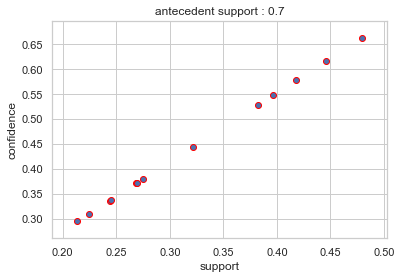

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
           antecedents consequents  antecedent support  consequent support  \
0                (Mr.)      (Dead)            0.579775            0.615730   
1           (3, Adult)         (S)            0.248315            0.723596   
2             (3, Mr.)      (Dead)            0.357303            0.615730   
3               (3, S)      (Dead)            0.396629            0.615730   
4        (Dead, Adult)       (Mr.)            0.319101            0.579775   
5         (Mr., Adult)      (Dead)            0.328090            0.615730   
6        (Dead, Adult)         (S)            0.319101            0.723596   
7         (Mr., Adult)         (S)            0.328090            0.723596   
8             (S, Mr.)      (Dead)            0.446067     

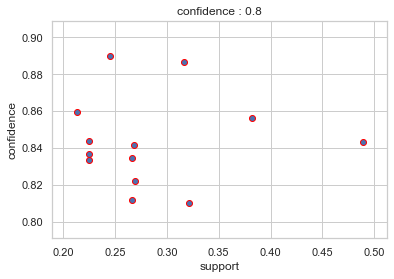

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  conviction  :  3
-------------------------------------
   antecedents consequents  antecedent support  consequent support   support  \
0     (3, Mr.)      (Dead)            0.357303             0.61573  0.316854   
1  (3, S, Mr.)      (Dead)            0.275281             0.61573  0.244944   

   confidence      lift  leverage  conviction  
0    0.886792  1.440229  0.096851    3.394382  
1    0.889796  1.445107  0.075445    3.486891  


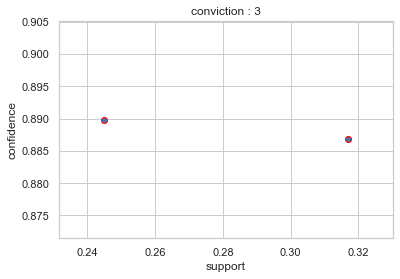

In [22]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
config = [
    ('antecedent support', 0.7),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print ('Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th)
        continue
    print (rules.columns.values)
    print ('-------------------------------------')
    print ('Configuration : ', metric_type, ' : ', th)
    print ('-------------------------------------')
    print (rules)

    support=rules['support'].to_numpy()
    confidence=rules['confidence'].to_numpy()

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Title Result
---

## Interesting Information - Title Analysis:

- Persons Who are Title : Mr.  With  Class : 3 and Embarked : S, have 88.9796 %  Confidence  Survived : Dead

---

## How to filter ? - A simple Demo
---

In [17]:
rules[rules['confidence']==rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(3, Mr.)",(Dead),0.357303,0.61573,0.316854,0.886792,1.440229,0.096851,3.394382


In [18]:
rules[rules['confidence']==rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(3, S, Mr.)",(Dead),0.275281,0.61573,0.244944,0.889796,1.445107,0.075445,3.486891


In [19]:
rules = association_rules (output, metric='support', min_threshold=0.1)
rules[rules['confidence'] == rules['confidence'].min()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(S),"(3, Adult)",0.723596,0.248315,0.213483,0.295031,1.188134,0.033804,1.066267


In [20]:
rules[rules['confidence'] == rules['confidence'].max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73,"(3, S, Mr.)",(Dead),0.275281,0.61573,0.244944,0.889796,1.445107,0.075445,3.486891


This notebook is adaption from the following kaggle notebook https://www.kaggle.com/bhanuchanderu/data-mining-a-demo-with-titanic-data.